In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

#### Clustering- Divide the universities in to groups(Clusters)

In [17]:
univ=pd.read_csv("Universities.csv")
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


#### EDA

In [19]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [20]:
#### read all numeric values
univ1=univ.iloc[:,1:]
univ1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [21]:
cols=univ1.columns
cols

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [22]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_univ_df=pd.DataFrame(scaler.fit_transform(univ1),columns=cols)
scaled_univ_df
# scaler.fit_tranmsform(univ1)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


#### 11-2-25

In [24]:
# Build 3 clusters using KMeans Cluster alogirthm
from sklearn.cluster import KMeans
clusters_new=KMeans(3, random_state=0) # Specify 3 clusters
clusters_new.fit(scaled_univ_df)

KMeans(n_clusters=3, random_state=0)

In [25]:
# print the cluster labels
clusters_new.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

In [26]:
set(clusters_new.labels_)

{0, 1, 2}

In [27]:
# Assign clusters to the univ data set
univ['clusterid_new']=clusters_new.labels_

In [28]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [29]:
univ.sort_values(by="clusterid_new")

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
20,UMichigan,1180,65,68,16,15470,85,0
17,TexasA&M,1075,49,67,25,8704,67,0
15,Purdue,1005,28,90,19,9066,69,0
13,PennState,1081,38,54,18,10185,80,0
23,UWisconsin,1085,40,69,15,11857,71,0
0,Brown,1310,89,22,13,22704,94,1
22,UVA,1225,77,44,14,13349,92,1
21,UPenn,1285,80,36,11,27553,90,1
19,UChicago,1290,75,50,13,38380,87,1
18,UCBerkeley,1240,95,40,17,15140,78,1


In [30]:
univ.iloc[:,1:].groupby("clusterid_new").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,,
0,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
1,1306.388889,84.277778,31.277778,11.777778,28175.111111,90.444444
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


#### Observations:
- Custer 2 appears to be the top rated universitiesﬁcluster as cut off score, Top10, SFRatio parameter mean values are highest
- Cluster 1 appears to occupy the middle level rated universities 
- Cluster 0 comes as the lower level rated universities

#### Finding optimal k value using elbow plot

[150.0, 64.1452839501027, 49.69054164653248, 34.79612750585774, 28.968669047324088, 25.012005085561192, 22.058835963741735, 17.50346369017422, 14.550294568354765, 11.534641754172174, 9.913351835524065, 8.82180724462987, 7.105666946966512, 6.1110919118148646, 3.6133492318650804, 2.9298229590953895, 2.601273981139518, 2.1199139898076504, 1.6797535810239919]


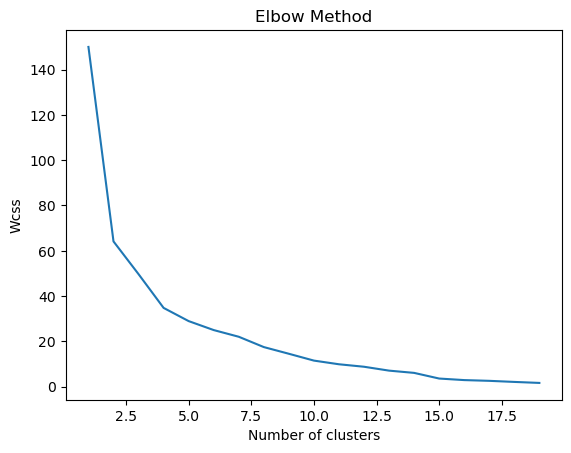

In [33]:
wcss = [ ]
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,random_state=0 )
    kmeans.fit(scaled_univ_df)
    #kmeans . Fit(Univ1)
    wcss.append(kmeans . inertia_)
print(wcss)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

#### Observations
- from the above grqaph we choose k=3 or 4 which indicates elbow join i.e rate of change of slope decraeses

#### 12-2-25

In [37]:
# quality of clusters is expresseds in terms of silhoutte score
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_univ_df, clusters_new.labels_, metric='euclidean')
score


0.41616499740070767